# Trabalho

## Entrega
- Trabalho entrega até 1 dia depois do último dia de aula (09/04)
- Grupo de 5 pessoas no máximo
- Entrega por e-mail: hermeto.lucas@gmail.com - Só uma pessoa do grupo
- Formato: zip (.ipynb, dados) ou link git

## Descrição

1. Entender o problema (objetivo)
    - O que você gostaria de saber?
    - Dicas para criar uma hipótese: Escolher apenas uma variável para observar, definir uma mudança (aumento e diminuição)
    - Criar uma hipótese que é possível responder com os dados. Ex: Gostaria de entender se as vendas em uma loja teve um aumento significativo (intervalo de confiança de 95%) durante o Q1 de 2021 e o Q1 de 2022 para que assim eu consiga inferir que as melhorias foram de fato um aumento orgânico ou um aumento por trazer mais pessoas que gastam. **Hipótese**: Houve uma mudança nas vendas de Q1 de 2021 e Q1 de 2022

2. Entender os dados (usar a estatística para isso)
    - Como foram coletado os dados?
    - Quais foram as intenções da coleta dos dados (Trabalhos relacionados)?
    - Descrever as colunas: Quais dados elas contém, o tipo de dado, existe alguma regra de negócio?
    - Tem dado faltante? Precisamos limpar/substituir esses dados?
    - Definir a variável aleatória que deseja observar
    - Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação
        - Não é necessário calcular a média de todas as variáveis, explicar porque calcula e a importância de usar ela na sua hipótese
        - Faça ao menos uma Correlação e explique como esses dados podem auxiliar na tomada de decisão
    - Identificar os outliers
    - Criar gráficos para fazer a visualização dos dados

3. Limpar os dados (preparar os dados)

4. Conclusão sobre os dados
    - Concluir a hipótese analisada e como isso afeta a sua definição de problema?

# Exemplo

## Hipótese

**Motivação:** Gostaria de entender o mercado financeiro de startups olhando o investimento (em dólar) realizado nelas durante um certo período de tempo, para assim conseguir recomendar o investimento nesse mercado

**Hipótese:** Houve um aumento no valor investimento (aquisição + rodada de investimento) por startup durante os anos de x a y


## Dados
- Precisamos de uma base de dados com valores de investimento por startup durante um certo período de tempo, maior do que 5 anos
- Procuramos uma plataforma com os dados necessários (Crunchbase/Kaggle) - https://www.kaggle.com/datasets/justinas/startup-investments

**Descrição**
- Temos 2 base de dados (acquisitions.csv, funding_rounds.csv) que descrevem os diferentes tipos de investimentos que podem ser realizados
- Dentro dessa base, temos id's que são relacionados as empresas investindo ou sendo investidas e para saber mais informações das empresas, podemos utilizar a base objects.csv para enriquecer o valor dos ids


**Colunas**


**acquisitions.csv:**
- acquisition_id: id único para identificar a aquisição
- acquiring_object_id: id da empresa/pessoa/fundo que adquiriu outra empresa
- acquired_object_id: id da empresa/pessoa/fundo que foi adquirida por outra empresa
- term_code: a forma de pagamento da aquisição (dinheiro ou ação da empresa)
- price_amount: o valor total pago
- price_currency_code: tipo da moeda utilizada para a transação
- acquired_at: data de aquisição

In [86]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
import pandas as pd


pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [4]:
df_acquisitions = pd.read_csv('acquisitions.csv')
df_funding_rounds = pd.read_csv('funding_rounds.csv')
# df_objects = pd.read_csv('objects.csv')

### Descrição das bases de dados

In [12]:
print(df_acquisitions.columns)
display(df_acquisitions.head(5))

Index(['id', 'acquisition_id', 'acquiring_object_id', 'acquired_object_id',
       'term_code', 'price_amount', 'price_currency_code', 'acquired_at',
       'source_url', 'source_description', 'created_at', 'updated_at'],
      dtype='object')


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [25]:
# Temos apenas a variável price_amount como sendo quantitativa
df_acquisitions['price_amount'].describe()

count    9.562000e+03
mean     3.886191e+08
std      2.660374e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+05
max      2.600000e+12
Name: price_amount, dtype: float64

In [21]:
df_acquisitions['term_code'].value_counts()

term_code
cash              1240
cash_and_stock     448
stock              218
Name: count, dtype: int64

In [53]:
# Analisando price_amount 0: provavelmente são dados onde não temos o total gasto na aquisição

n_dados = df_acquisitions.count()[0]
n_dados_zero = df_acquisitions[df_acquisitions['price_amount'] == 0].count()[0]
print(f'Total de dados com price_amout = 0: {n_dados_zero}/{n_dados} = {n_dados_zero/n_dados * 100}%')

# Dado que esses dados faltantes não é por um erro humano, precisamos apenas remove-los
df_acquisitions_filtered = df_acquisitions[df_acquisitions['price_amount'] != 0][['acquired_at', 'acquiring_object_id', 'acquired_object_id', 'term_code', 'price_amount', 'price_currency_code']]
df_acquisitions_filtered.rename(columns={'acquired_at': 'date', 'price_amount': 'value', 'price_currency_code': 'currency_code'}, inplace=True)

Total de dados com price_amout = 0: 6963/9562 = 72.81949382974273%


In [69]:
df_acquisitions_filtered['value'].describe()

count    2.599000e+03
mean     1.429771e+09
std      5.102118e+10
min      1.000000e+00
25%      1.176000e+07
50%      5.200000e+07
75%      2.540000e+08
max      2.600000e+12
Name: value, dtype: float64

In [46]:
print(df_funding_rounds.columns)
display(df_funding_rounds.head(5))

#[object_id, funded_at, raised_amount, raised_currency_code]

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [47]:
df_funding_rounds['raised_amount'].describe()

count    5.292800e+04
mean     8.056120e+06
std      4.479914e+07
min      0.000000e+00
25%      2.500000e+05
50%      1.565056e+06
75%      6.600000e+06
max      3.835050e+09
Name: raised_amount, dtype: float64

In [51]:
# Analisando raised_amount 0:

n_dados = df_funding_rounds.count()[0]
n_dados_zero = df_funding_rounds[df_funding_rounds['raised_amount'] == 0].count()[0]
print(f'Total de dados com raised_amount = 0: {n_dados_zero}/{n_dados} = {n_dados_zero/n_dados * 100}%')

# Dado que esses dados faltantes não é por um erro humano, precisamos apenas remove-los
df_funding_rounds_filtered = df_funding_rounds[df_funding_rounds['raised_amount'] != 0][['object_id', 'funded_at', 'raised_amount', 'raised_currency_code']]
df_funding_rounds_filtered.rename(columns={'funded_at': 'date', 'raised_amount': 'value', 'raised_currency_code': 'currency_code'}, inplace=True)

Total de dados com raised_amount = 0: 5638/52928 = 10.65220677146312%


In [70]:
df_funding_rounds_filtered['value'].describe()

count    4.729000e+04
mean     9.016585e+06
std      4.730308e+07
min      1.000000e+03
25%      5.000000e+05
50%      2.100000e+06
75%      8.000000e+06
max      3.835050e+09
Name: value, dtype: float64

In [61]:
# TO DO: Analisar porque na mesma data temos uma empresa sendo adquirida e tendo fundo levantado (investigar o modelo de negócio de CV)

df_acquisitions_filtered.rename(columns={'acquired_object_id': 'object_id'}, inplace=True)
df_validate_object_id = df_acquisitions_filtered.merge(df_funding_rounds_filtered, on=['date', 'object_id'], how='left')

df_validate_object_id[(df_validate_object_id['value_x'] > 0) & (df_validate_object_id['value_y'] > 0)]

,date,acquiring_object_id,object_id,term_code,value_x,currency_code_x,value_y,currency_code_y
38,2007-06-01,c:629,c:807,cash,42000000.0,USD,2500000.0,USD
125,2008-04-13,c:2358,c:135,NaN,3000000.0,USD,2800000.0,USD
275,2008-10-07,c:4175,c:15451,cash,5000000.0,USD,26000000.0,USD
945,2010-01-07,c:39681,c:39364,NaN,255000000.0,USD,26100000.0,USD
1117,2010-06-24,c:50792,c:657,NaN,126500000.0,USD,126500000.0,USD
1389,2011-01-06,c:62,c:1628,NaN,150000000.0,USD,6300000.0,USD
1979,2013-05-13,c:210556,c:210478,NaN,308000000.0,USD,75000000.0,USD
2106,2006-11-01,c:14904,c:58020,NaN,140000000.0,USD,4500000.0,USD
2354,2013-09-18,c:265611,c:102849,NaN,96000000.0,USD,125000000.0,USD


In [66]:
df_investments = pd.concat([df_funding_rounds_filtered, df_acquisitions_filtered])

### Visualização

In [73]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49889 entries, 0 to 9561
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   object_id            49888 non-null  object 
 1   date                 49771 non-null  object 
 2   value                49889 non-null  float64
 3   currency_code        49889 non-null  object 
 4   acquiring_object_id  2599 non-null   object 
 5   term_code            1250 non-null   object 
dtypes: float64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
# Como utilizar o astype
# dict_types = {
#     'object_id': 'str',
#     'date': 'datetime64[ns]',
#     'value': 'float'
# }

# df_investments['object_id'] = df_investments['object_id'].astype('str')
# df_investments = df_investments.astype(dict_types)

In [93]:
df_investments['date'] = pd.to_datetime(df_investments['date'])
df_investments['year'] = df_investments['date'].dt.year
df_investments['month'] = df_investments['date'].dt.month

df_investments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49608 entries, 0 to 9561
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object_id            49608 non-null  object        
 1   date                 49608 non-null  datetime64[ns]
 2   value                49608 non-null  float64       
 3   currency_code        49608 non-null  object        
 4   acquiring_object_id  2549 non-null   object        
 5   term_code            1210 non-null   object        
 6   year                 49608 non-null  int32         
 7   month                49608 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 3.0+ MB


In [94]:
# Limpeza de dados com date nulo
df_investments = df_investments[~df_investments['date'].isna()]
df_investments = df_investments[df_investments['year'] >= 2000]

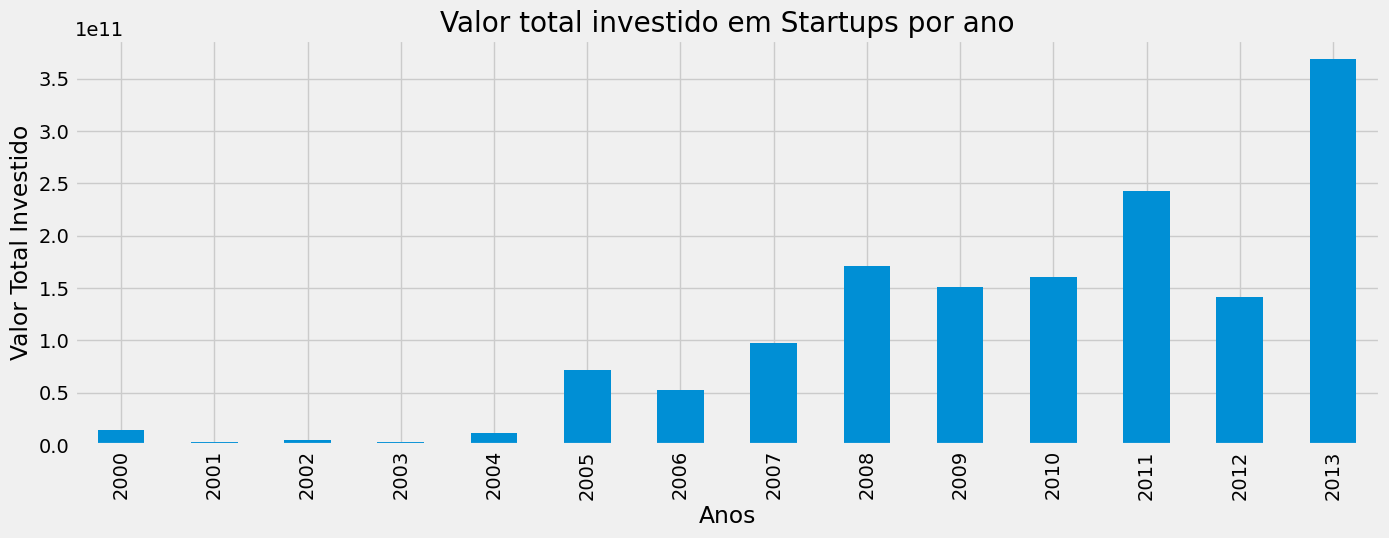

In [95]:
df_year_investments = df_investments.groupby('year')['value'].sum()

plt.figure(figsize=(15, 5))
df_year_investments.plot(kind='bar')
plt.xlabel('Anos')
plt.ylabel('Valor Total Investido')
plt.title('Valor total investido em Startups por ano')
plt.show()

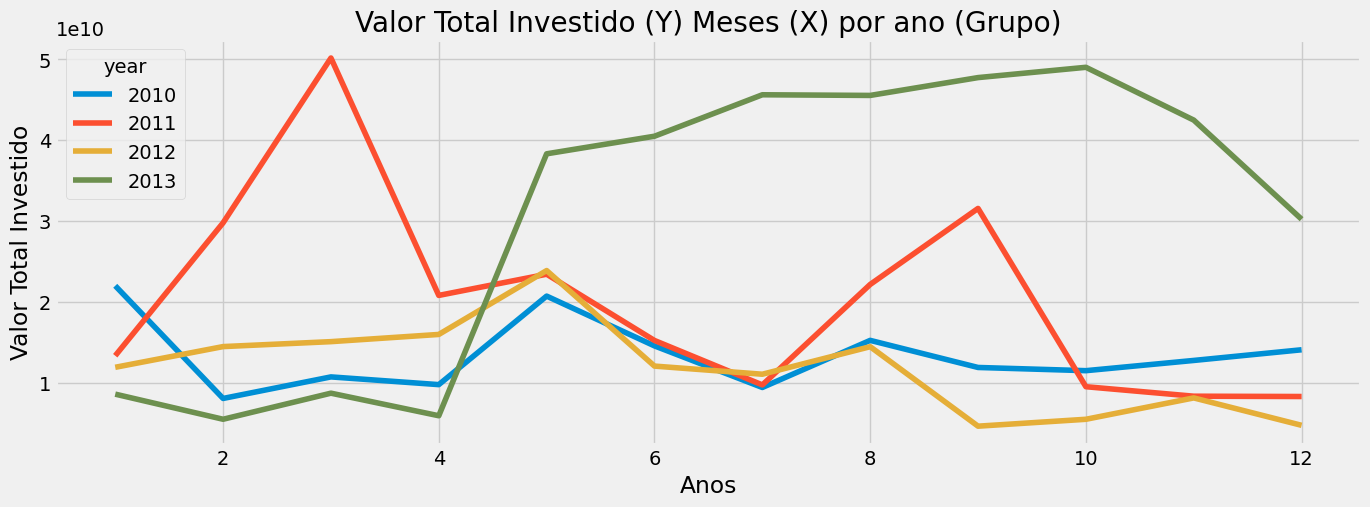

In [115]:
df_month_investments = df_investments.groupby(['year', 'month'], as_index=False)['value'].sum()
df_month_investments = pd.pivot_table(df_month_investments, values='value', index='month', columns='year', aggfunc='sum').reset_index()

df_month_investments.plot(x='month', y=list(range(2010, 2014)), figsize=(15, 5))
plt.xlabel('Anos')
plt.ylabel('Valor Total Investido')
plt.title('Valor Total Investido (Y) Meses (X) por ano (Grupo)')
plt.show()

In [118]:
df_investments.describe()

,date,value,year,month
count,49608,4.960800e+04,49608.000000,49608.000000
mean,2010-10-06 04:50:58.345428224,3.011973e+07,2010.288865,6.310434
min,2000-01-01 00:00:00,1.000000e+00,2000.000000,1.000000
25%,2009-03-25 00:00:00,5.150000e+05,2009.000000,3.000000
50%,2011-05-16 00:00:00,2.500000e+06,2011.000000,6.000000
75%,2012-10-01 00:00:00,9.000000e+06,2012.000000,9.000000
max,2013-12-12 00:00:00,3.900000e+10,2013.000000,12.000000
std,NaN,4.054749e+08,2.470952,3.499964


<Axes: >

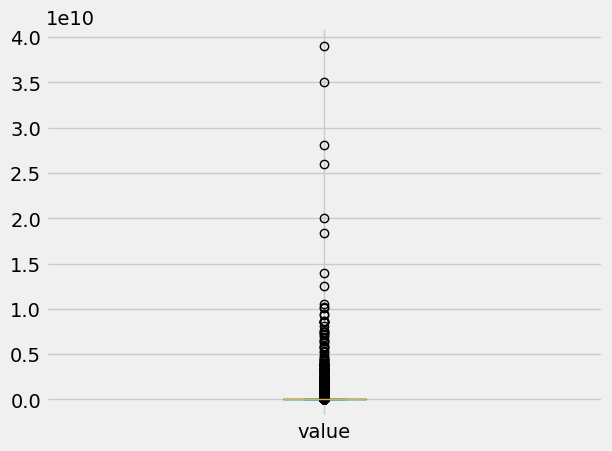

In [117]:
df_investments['value'].plot(kind='box')

In [126]:
df_investments.describe(percentiles=[.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.99])

,date,value,year,month
count,49608,4.960800e+04,49608.000000,49608.000000
mean,2010-10-06 04:50:58.345428224,3.011973e+07,2010.288865,6.310434
min,2000-01-01 00:00:00,1.000000e+00,2000.000000,1.000000
1%,2004-01-01 00:00:00,1.000000e+04,2004.000000,1.000000
5%,2006-01-01 00:00:00,4.000000e+04,2006.000000,1.000000
25%,2009-03-25 00:00:00,5.150000e+05,2009.000000,3.000000
50%,2011-05-16 00:00:00,2.500000e+06,2011.000000,6.000000
75%,2012-10-01 00:00:00,9.000000e+06,2012.000000,9.000000
80%,2013-01-12 00:00:00,1.160000e+07,2013.000000,10.000000
99%,2013-11-27 00:00:00,3.967670e+08,2013.000000,12.000000
